In [48]:
'''Este projeto tem como objetivo analizar as séries histórias da temperatura da cidade do recife. 
Isso com base dos dados coletados pelos satélites da NASA. '''

'Este projeto tem como objetivo analizar as séries histórias da temperatura da cidade do recife. \nIsso com base dos dados coletados pelos satélites da NASA. '

In [49]:
'''Referências:

https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=BRM00082900&ds=14&dt=1
https://datatofish.com/string-to-integer-dataframe/
https://www.kaggle.com/garipurv/temperature-time-seriesforbrazilian-cities
https://www.kaggle.com/robikscube/tutorial-time-series-forecasting-with-xgboost

Uso da função: pd.melt() -> Para agregação das colunas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
'''



'Referências:\n\nhttps://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=BRM00082900&ds=14&dt=1\nhttps://datatofish.com/string-to-integer-dataframe/\nhttps://www.kaggle.com/garipurv/temperature-time-seriesforbrazilian-cities\nhttps://www.kaggle.com/robikscube/tutorial-time-series-forecasting-with-xgboost\n\nUso da função: pd.melt() -> Para agregação das colunas\nhttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html\n'

In [50]:
#Importar bibliotecas

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import os

import warnings 
warnings.filterwarnings("ignore")


In [51]:
dir_data = "/home/anderson/Área de Trabalho/Repositorio_GitHub/Mineracao Dados-Prescritivo/Series temporais/Projeto/439105_833630_bundle_archive"
filename = "station_recife.csv"
input_data = pd.read_csv(os.path.join(dir_data,filename))
input_data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1942,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,25.23,999.90,999.90,999.90,999.90,999.90
1,1943,25.73,25.73,26.03,24.83,24.03,23.23,22.33,22.53,23.43,24.73,25.13,25.52,25.56,24.96,22.70,24.43,24.41
2,1944,25.62,25.92,26.22,25.02,24.12,23.42,22.62,21.92,22.82,24.32,25.42,26.02,25.69,25.12,22.65,24.19,24.41
3,1945,26.52,25.52,26.52,25.82,24.32,22.72,22.32,23.02,23.82,24.52,25.52,25.41,26.02,25.55,22.69,24.62,24.72
4,1946,25.51,26.41,25.81,24.61,24.51,23.41,23.41,23.41,23.61,24.41,24.81,25.30,25.78,24.98,23.41,24.28,24.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2015,26.75,27.45,26.65,27.00,26.45,25.30,24.80,24.75,25.70,26.35,27.05,27.40,27.00,26.70,24.95,26.37,26.25
74,2016,27.65,27.65,27.65,27.20,26.05,25.10,24.65,24.75,25.75,26.85,27.55,27.35,27.57,26.97,24.83,26.72,26.52
75,2017,27.60,28.05,27.50,26.80,26.20,25.35,24.30,24.30,25.00,25.95,26.95,27.60,27.67,26.83,24.65,25.97,26.28
76,2018,27.10,27.15,27.15,26.15,25.85,24.75,24.10,24.40,25.00,26.50,27.25,27.20,27.28,26.38,24.42,26.25,26.08


In [52]:
#Capturar o arquivo
input_data.keys()


Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'],
      dtype='object')

In [53]:
# 1) - Preencho os valores que estão como '999' para 'Nan', valor nullo.
# 2) - Pegar os valores nulos e adicionar um valor correspondente a média dos 
#      valores dos últimos 12 mêses daquele ano.

for j in input_data.columns:
    input_data[j] = input_data[j].replace(999.90, np.NaN) # (1)
    input_data[j] = input_data[j].fillna(input_data[j].rolling(12,1).mean()) # (2)
        

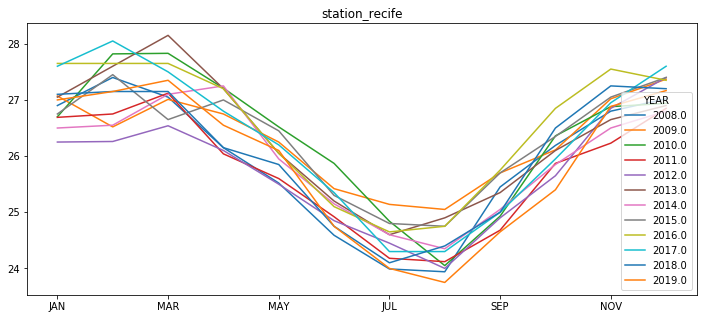

In [54]:
#Excluir colunas desnecessárias.
input_data.drop(['D-J-F','M-A-M','J-J-A','S-O-N'], axis=1, inplace=True)
df = input_data.T
df.columns = df.iloc[0]
df.drop(['YEAR'], axis=0, inplace=True)
    
#Plotar média de temperatura ao longo dos meses, a partir de alguns anos.
#plt.figure(figsize=(18,12))
df.iloc[:-1,-12:].plot(figsize=(12,5), title='station_recife')
    

In [55]:
input_data.keys()

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'metANN'],
      dtype='object')

In [56]:
#Realizar o agrupamento das colunas de meses para linhas.

#Agrupar colunas dos mêses em uma única linha relacionado a coluna YEAR e metANN
input_data = pd.melt(input_data, id_vars=['YEAR','metANN'], value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC',], 
                        var_name='month',value_name='Temp')

#Formatar o valor da data para o novo campo 'Date'
input_data['Date'] = pd.to_datetime(input_data['YEAR'].astype(str)+'/'+input_data['month'].astype(str)+'/01')

#Remover as colunas YEAR e month, já que vou usar a nova colna Date, criada.
input_data.drop(['YEAR','month'],axis=1,inplace=True)

#Ordenar pela coluna Date, de forma crescente.
input_data.sort_values(by='Date',inplace=True)

#Exibir o novo dataset criado.
print(input_data[:4])


     metANN  Temp       Date
0       NaN   NaN 1942-01-01
78      NaN   NaN 1942-02-01
156     NaN   NaN 1942-03-01
234     NaN   NaN 1942-04-01


In [57]:
#Exibindo valores do novo dataset
input_data[:4]

,metANN,Temp,Date
0,NaN,NaN,1942-01-01
78,NaN,NaN,1942-02-01
156,NaN,NaN,1942-03-01
234,NaN,NaN,1942-04-01


In [58]:
temp_data = {}
metANN_data = {}

#Montando duas colunas para o dataset.
temp_data = input_data[['Date','Temp']]

#Setando o Indice para coluna de Date
temp_data = temp_data.set_index('Date')

#Montando dataset, porém com a coluna por Anos
metANN_data = input_data[['Date','metANN']]

#Agrupando por frequencia em Anos.
metANN_data = metANN_data.groupby(pd.Grouper(key='Date', freq='Y')).mean()
   
list(temp_data.keys())

['Temp']

In [59]:
metANN_data

,metANN
Date,
1942-12-31,NaN
1943-12-31,24.41
1944-12-31,24.41
1945-12-31,24.72
1946-12-31,24.61
...,...
2015-12-31,26.25
2016-12-31,26.52
2017-12-31,26.28


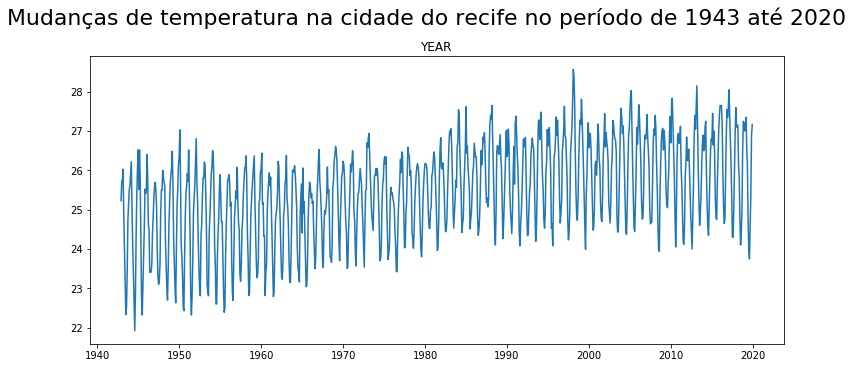

In [60]:
#Configuração do plot, tamanho e quantidades de quadros de exibição
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)

#Adicionando um título ao plot
fig.suptitle("Mudanças de temperatura na cidade do recife no período de 1943 até 2020", fontsize=22)

#Adicionando os dados de recife ao plot.
ax.plot(temp_data)

#Setando um título ao gráfico.
ax.set_title('YEAR')

#Mostrando o plot.
plt.show()


In [61]:
#Criando um novo dataframe
new_df = pd.DataFrame(temp_data['Temp'])

In [62]:
#Resetando o indice da tabela.
new_df.reset_index(level=0, inplace=True)


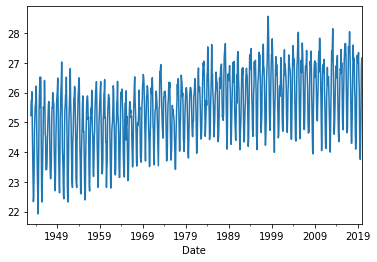

In [63]:
#Passando o campo Date para datetime
new_df['Date'] = pd.to_datetime(new_df['Date']) 

#Pegando a coluna Temp e colocando o campo Date como indice
serie_temp = pd.Series(new_df['Temp'].values, index= new_df['Date'])

#Checar os tipos dos campos da série criada.
serie_temp.dtypes

#Plotando a série
serie_temp.plot()

In [64]:
#Diante análise: Há uma tendência como também há uma sazonalidade, com isso, irei iniciar removendo a tendência.

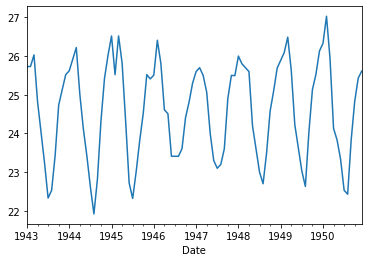

In [65]:
#Pegando um período determinado para plotar
serie_temp = serie_temp.loc['1943':'2020']
serie_temp.loc['1942':'1950'].plot();

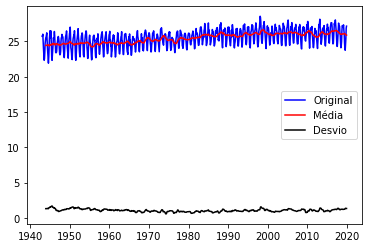

In [66]:
#Janela em mêses
m_m = serie_temp.rolling(window=12).mean()
m_std = serie_temp.rolling(window=12).std() 

#Plotando a linha original
orig = plt.plot(serie_temp, color='blue',label='Original')

#Plotando a linha da média
mean = plt.plot(m_m, color='red',label='Média')

#Plotando a linha do desvio padrão
std = plt.plot(m_std, color='black',label='Desvio')

#Adicionando uma legenda
plt.legend(loc='best')

#Exibindo o plot
plt.show()

In [67]:
# Essa média não está constante, ou seja, 
# mesmo observando que sofre uma pequena variação ao longo dos anos, ela não é estacionária.
# justamente a média, diz que um modelo é estacionário ou não.

In [68]:
#Estimando componente e tendência

#utilizando regressão linear para modelar tendência
from sklearn.linear_model import LinearRegression


X = [i for i in range(0, len(serie_temp))] #indices
X = np.reshape(X, (len(X), 1))
y = serie_temp
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
tendencia = modelo.predict(X)

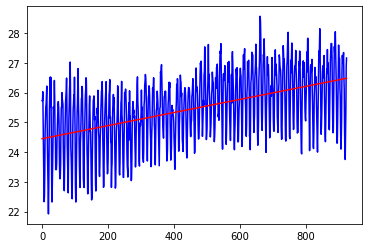

In [70]:
plt.plot(serie_temp.values, color='blue',label='Original')
plt.plot(tendencia,color='red', label='Tendência' )
plt.show()

In [71]:
#eliminando a tendência
serie_sem_tendencia = serie_temp - tendencia

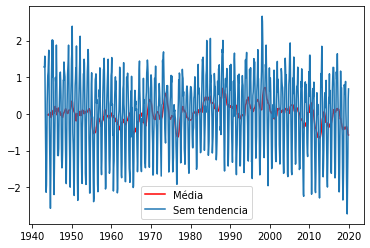

In [72]:
m_m = serie_sem_tendencia.rolling(window=12).mean()
mean = plt.plot(m_m, color='red',label='Média')
plt.plot(serie_sem_tendencia, label='Sem tendencia')
plt.legend(loc='best')
plt.show()


In [73]:
#Primeiro eu estimo a sazonalidade

# fit polynomial
from numpy import polyfit

X = [i for i in range(0, len(serie_sem_tendencia))]
y = serie_sem_tendencia.values
degree = 10 #4 polinomios
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef);

Coefficients: [-2.04063981e-26  7.93525907e-23 -1.26688328e-19  1.06449880e-16
 -4.98885830e-14  1.26025846e-11 -1.52414053e-09  1.06225628e-07
 -1.75491673e-05  6.13743221e-04  7.07360688e-02]


In [74]:
curva = []
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curva.append(value)

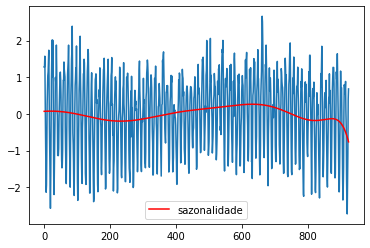

In [75]:
plt.plot(serie_sem_tendencia.values)
plt.plot(curva, color='red', label='sazonalidade')
plt.legend(loc='best')
plt.show()

In [76]:
#eliminando a sazonalidade
serie_sem_tendencia_sazonalidade = serie_sem_tendencia - curva

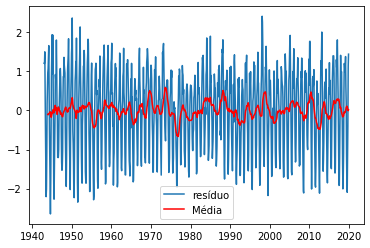

In [77]:
m_m = serie_sem_tendencia_sazonalidade.rolling(window=12).mean()
plt.plot(serie_sem_tendencia_sazonalidade, label='resíduo')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

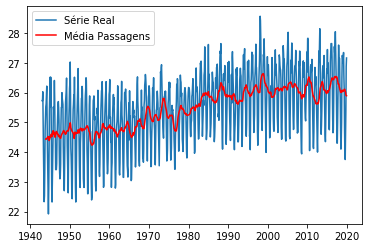

In [78]:
#Aplicando técnicas de suavização:

#Estimando e eliminando a tendência através de média móveis

rolling = serie_temp.rolling(window=12)
rolling_mean = rolling.mean()

# plot original and transformed dataset
plt.plot(serie_temp, label='Série Real')
plt.plot(rolling_mean,color='red', label='Média Passagens')
plt.legend(loc='best')
plt.show()


In [79]:
serie_sem_tendencia = serie_temp - rolling_mean

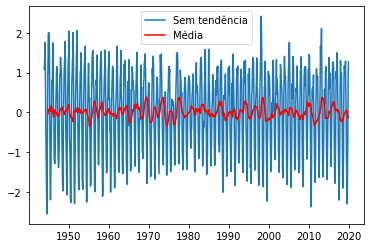

In [80]:
m_m = serie_sem_tendencia.rolling(window=12).mean()
plt.plot(serie_sem_tendencia, label='Sem tendência')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

#Média móvel sem tendência.

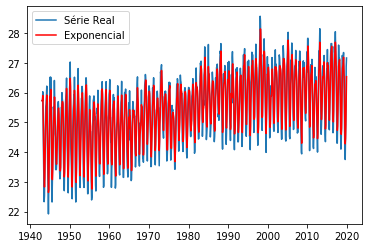

In [81]:
#### Estimando a tendência através de suavização exponencial
rolling = serie_temp.ewm(alpha =0.5)
rolling_exp = rolling.mean()
plt.plot(serie_temp, label='Série Real')
plt.plot(rolling_exp,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()


In [82]:
#eliminando a tendência
serie_sem_tendencia_exp = serie_temp - rolling_exp

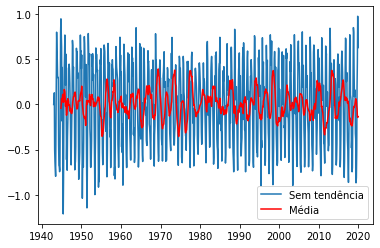

In [83]:
m_m = serie_sem_tendencia.rolling(window=12).mean()
plt.plot(serie_sem_tendencia_exp, label='Sem tendência')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()
#Aqui temos uma série sem endência.

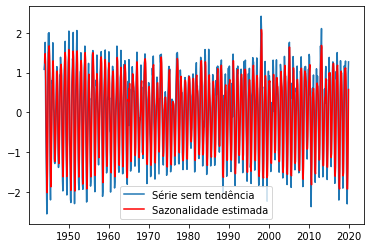

In [84]:
#### Estimando e eliminando a sazonalidade através de média móveis

rolling = serie_sem_tendencia.rolling(window=3)
rolling_mean = rolling.mean()
plt.plot(serie_sem_tendencia, label='Série sem tendência')
plt.plot(rolling_mean,color='red', label='Sazonalidade estimada')
plt.legend(loc='best')
plt.show()

In [85]:
# eliminando o componente de sazonalidade
serie_sem_tendencia_sazonalidade = serie_sem_tendencia - rolling_mean

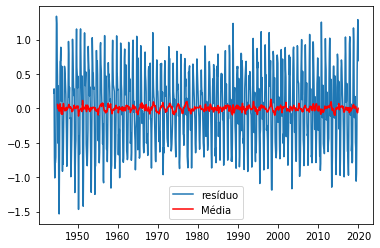

In [86]:
m_m = serie_sem_tendencia_sazonalidade.rolling(window=12).mean()
plt.plot(serie_sem_tendencia_sazonalidade, label='resíduo')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

#Fazendo a série estacionária sem tendência, após retirar a sazonalidade.

In [87]:
#Utilizando decomposição

from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
decomp = seasonal_decompose(serie_temp)

In [89]:
tendencia = decomp.trend #atributo tendencia
sazonalidade = decomp.seasonal #atributo sazonalidade
residuo = decomp.resid #Atributo resíduo

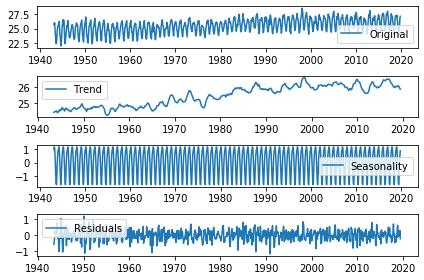

In [90]:
plt.subplot(411)
plt.plot(serie_temp, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

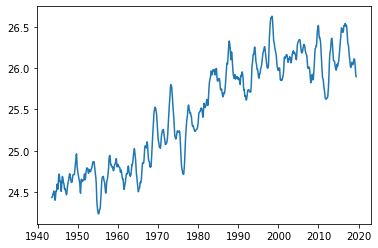

In [91]:
plt.plot(tendencia);

In [92]:
# Analisando o ruído

import statsmodels.graphics.tsaplots as smt

#Chegando nessa parte, a idéia agora é ajsutar a última parte, que é eliminar o ruído branco.
#Qual a decomposição eu utilizo? O nosso critério é ver o correlograma.

In [93]:
serie_sem_tendencia_sazonalidade.dropna(inplace=True) 

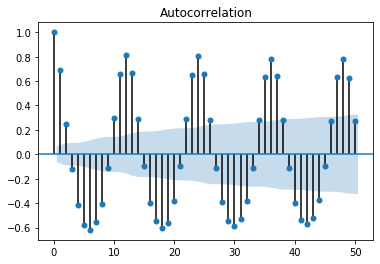

In [94]:
smt.plot_acf(serie_sem_tendencia_sazonalidade, lags=50, alpha=0.05);
#Aí olhamos para o ruído, se tiver fora da região, é um lag significativo. Em outras palavras: 
#O leg 9 está dentro da sombra, 4 tem correlação negativa com o 3. Ruído branco, valores dos lags, vão
#está dentro do meu correlograma, não tem nenhuma correlação temporal que sobrou do meu ruído. Nesse caso seria a hora de eu
#parar. 

#Com isso caso não satisfaça, você volta pra parte lá de cima. Da suavisação e etc..
#O objeto do ruído é que seja o index, ID.

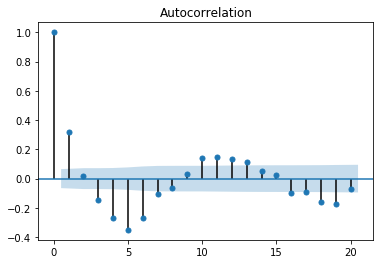

In [95]:
smt.plot_acf(residuo.dropna(), lags=20, alpha=0.05);

#O bom mesmo pra dizer se e estacionário ou não é com modelo estatístico.

In [96]:
#Aplicando diferenciação


#Isso tudo que fizemos podemos fazer isso utilizando o método da diferenciação.
#Que é o valor de amanhã menos o valor de hoje.

serie_diff_pd = serie_temp.diff()

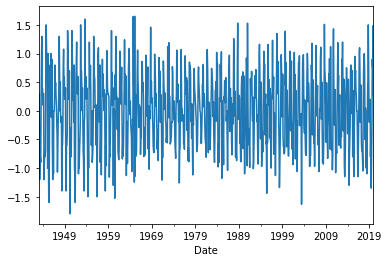

In [97]:
serie_diff_pd.plot() #Já eliminou a tendência

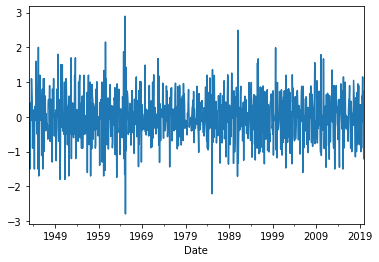

In [98]:
serie_diff_pd.diff().plot() 
#Quiser aplicar outra diferenciação. Normalmente aplicasse 
#no máximo duas diferenciações.

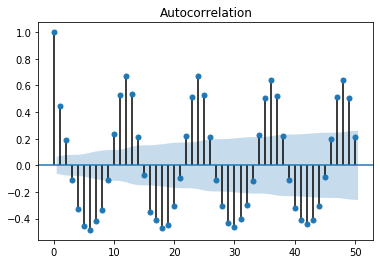

In [99]:
smt.plot_acf(serie_diff_pd.dropna(), lags=50, alpha=0.05);
#Mudando os lags, para 50 vocÊ consegue enxergar no correlogama,
#quais os meses passados tem correlação com os mêses anteriores,
#nesse caso a baixo, por exemplo, o mês de dezembro, não temmuita correlação com o mÊs anteiror
# e sim com o mês no ano passado, no caso de "Dezembro"

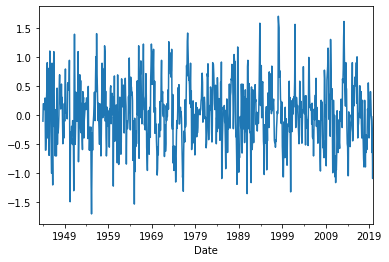

In [100]:
serie_temp.diff(12).plot()

#A série não tem mais o componente sazional.

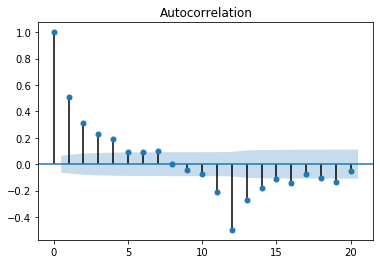

In [101]:
smt.plot_acf(serie_temp.diff(12).dropna(), lags=20, alpha=0.05);

#Plot do acf é uma função de correlação.

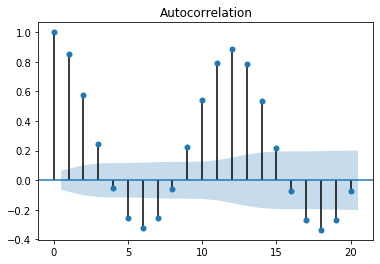

In [102]:
smt.plot_acf(serie_temp, lags=20, alpha=0.05);

#essa diferenciação é utilizado também dentro da lógica da sarima.

In [103]:
#Conceito do ruído branco é quando os dados então nessa sobrinha.Isso quer dizer que não tem correção relevantes,
#quer dizer que se quiserssimos fazer uma previssão aincerteza seria maior.

#Essa análise é pra checar que minha modelagem é ok, com a sazonalidade a tendência removida.
#Que meu modelo está seguindo uma média 0.

#Quanto faz mais diferenciação -> Ainda há ruídos, que é a diferenciação que é aparte aleatória.
#Isso usando tpecnicas lineares. 

In [104]:
###################################### Aplicando o modelo SARIMA ##############################################

In [105]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [106]:
temp_data

,Temp
Date,
1942-01-01,NaN
1942-02-01,NaN
1942-03-01,NaN
1942-04-01,NaN
1942-05-01,NaN
...,...
2019-08-01,23.750000
2019-09-01,24.650000
2019-10-01,25.400000


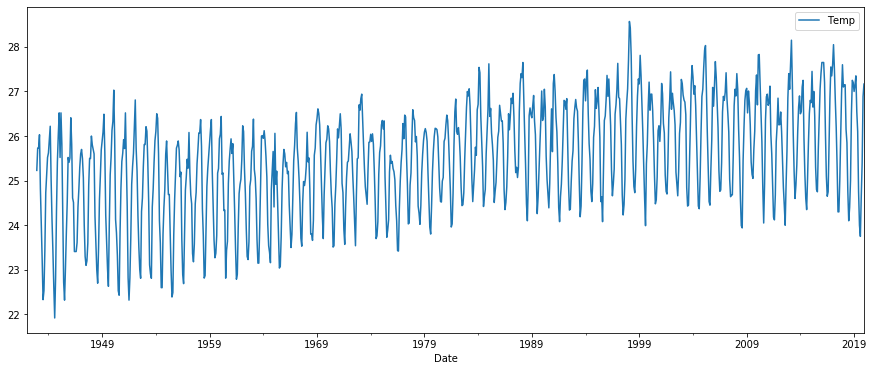

In [107]:
temp_data.plot();

In [108]:
#treinamento e teste
train_temp, test_temp = temp_data.loc['1943':'2018'], temp_data.loc['2019':]

In [109]:
train_temp

,Temp
Date,
1943-01-01,25.73
1943-02-01,25.73
1943-03-01,26.03
1943-04-01,24.83
1943-05-01,24.03
...,...
2018-08-01,24.40
2018-09-01,25.00
2018-10-01,26.50


In [110]:
test_temp

,Temp
Date,
2019-01-01,27.000000
2019-02-01,27.150000
2019-03-01,27.350000
2019-04-01,26.550000
2019-05-01,26.100000
2019-06-01,24.750000
2019-07-01,24.000000
2019-08-01,23.750000
2019-09-01,24.650000


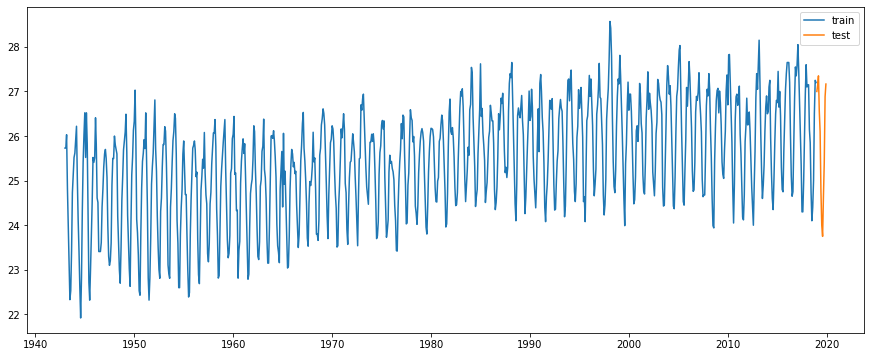

In [111]:
plt.plot(train_temp, label='train')
plt.plot(test_temp, label = 'test')
plt.legend(loc= 'best')
plt.show()

In [112]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

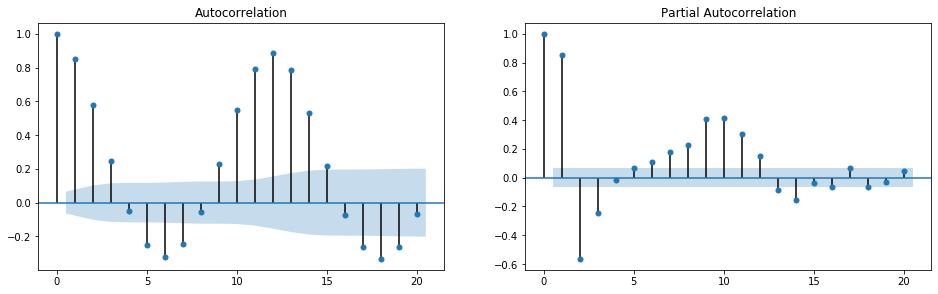

In [115]:
qtd_lag = 20
acf_pacf(train_temp, qtd_lag)

In [116]:
## teste de estacionariedade
from statsmodels.tsa.stattools import adfuller

In [117]:
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (10%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        
        print('--------estacionária')
    else:
        print(df_output[0])
        print('--------não estacionária')

In [118]:
teste_df(train_temp.Temp)

Test Statistic          -1.927582
p-value                  0.319199
#Lags                   21.000000
Nº Observações         890.000000
Valor Crítico (1%)      -3.437719
Valor Crítico (5%)      -2.864793
Valor Crítico (10%)     -2.568502
dtype: float64
-1.9275818768007555
--------não estacionária


In [119]:
#parâmetros
p,d,q = 1, 1, 1 #parâmetros do ARIMA
P,D,Q = 1,1,1   #parâmetros aplicados a sazonalidade
m = 12          # intervalo do tempo entre as sazonalidade, por exemplo intervalo de 12 meses

In [120]:
#Modelagem/Treinamento

model = SARIMAX(endog=train_temp,order=(p,d,q),seasonal_order=(P,D,Q,m)).fit()

In [121]:
model.predict(typ='levels')

1943-01-01     0.000000
1943-02-01    25.729999
1943-03-01    25.730000
1943-04-01    26.030000
1943-05-01    24.830000
                ...    
2018-08-01    24.278407
2018-09-01    25.232252
2018-10-01    26.036870
2018-11-01    27.057925
2018-12-01    27.368431
Freq: MS, Length: 912, dtype: float64

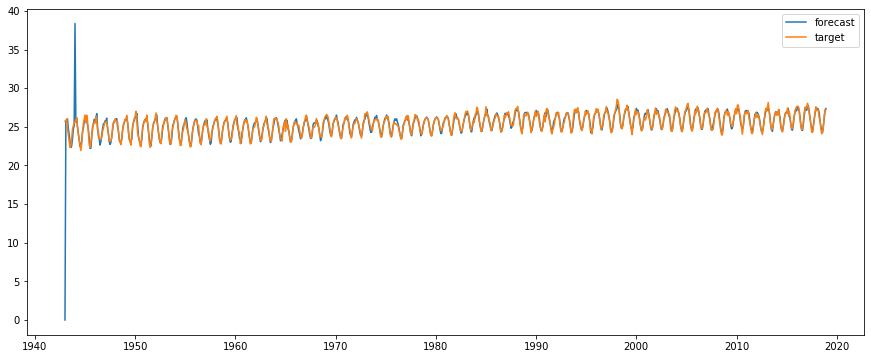

In [122]:
plt.plot(model.predict(typ='levels'), label = 'forecast')
plt.plot(train_temp, label = 'target')
plt.legend()
plt.show()

In [123]:
###############  AVALIAÇÃO ################

train_predict = model.predict(typ='levels')
residuo = train_temp.Temp.values - train_predict

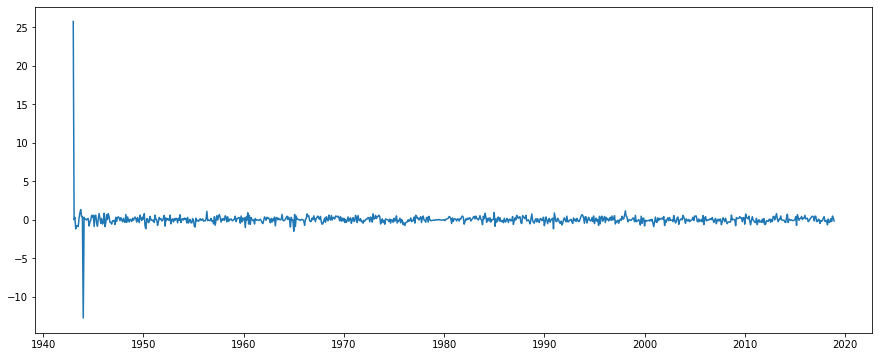

In [124]:
plt.plot(residuo);

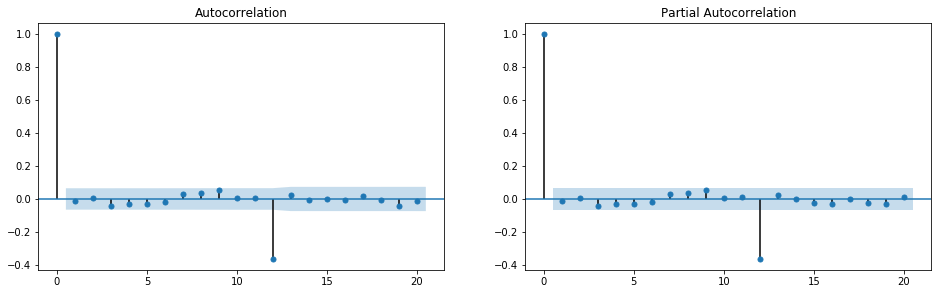

In [125]:
acf_pacf(residuo, 20)

In [126]:
#VEndo a eficácia com os dados de treinamento.
MAPE(train_temp.Temp.values,train_predict )

1.1978957833705242

In [127]:
################### TESTE ####################

In [134]:
predict_test = model.forecast(len(test_temp))

In [135]:
test_temp.Temp.values

array([27.        , 27.15      , 27.35      , 26.55      , 26.1       ,
       24.75      , 24.        , 23.75      , 24.65      , 25.4       ,
       26.88454545, 27.16636364])

In [136]:
predict_test

2019-01-01    27.109540
2019-02-01    27.372387
2019-03-01    27.332422
2019-04-01    26.849623
2019-05-01    26.139740
2019-06-01    25.244724
2019-07-01    24.633965
2019-08-01    24.572234
2019-09-01    25.309473
2019-10-01    26.237089
2019-11-01    26.949109
2019-12-01    27.225444
Freq: MS, dtype: float64

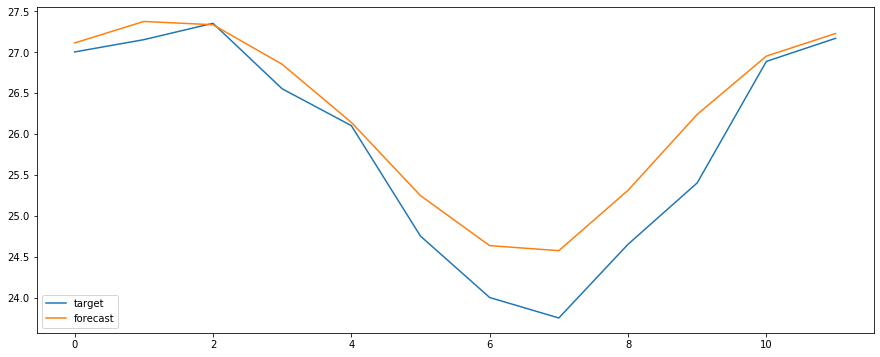

In [137]:
plt.plot(test_temp.Temp.values, label = 'target')
plt.plot(predict_test.values, label = 'forecast')
plt.legend()
plt.show()

In [138]:
#Agora, aferindo com os dados de teste.
MAPE(test_temp.Temp.values,predict_test ) #Bastante acertivo.

1.4250753889801668

In [139]:
######################################## Aplicando modelo MLP ##################################################

In [140]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [141]:
train_data, test_data = temp_data.loc['1943':'2018'], temp_data.loc['2019':]

In [142]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

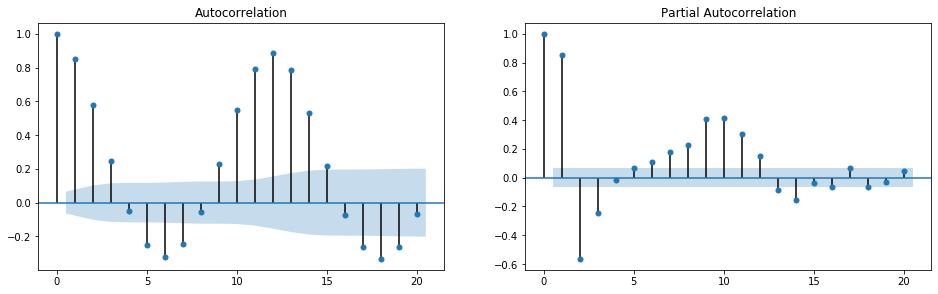

In [143]:
qtd_lag = 20
acf_pacf(train_data, qtd_lag)

In [144]:
def create_sliding_windows(series, window_size):
   
    list_of_sliding_windows = []
    list_size_to_iterate = len(series) - window_size 
    for i in range(0, list_size_to_iterate):
        window = series[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows).reshape(len(list_of_sliding_windows), window_size+1)

In [145]:
windows_train = create_sliding_windows(train_data.values, 20)

In [146]:
windows_train.shape


(892, 21)

In [147]:
perc_val = 0.2
tam_val = np.fix(len(windows_train) *perc_val).astype(int)

In [148]:
X_train, y_train = windows_train[0:-tam_val, 0:-1], windows_train[0:-tam_val, -1]
X_val, y_val = windows_train[-tam_val:, 0:-1], windows_train[-tam_val:, -1]

In [149]:
X_train.shape

(714, 20)

In [150]:
X_val.shape

(178, 20)

In [151]:
train_data['Temp'].values[-20:]

array([26.2 , 25.35, 24.3 , 24.3 , 25.  , 25.95, 26.95, 27.6 , 27.1 ,
       27.15, 27.15, 26.15, 25.85, 24.75, 24.1 , 24.4 , 25.  , 26.5 ,
       27.25, 27.2 ])

In [152]:
pontos_anteriores_test = train_data['Temp'].values[-20:]
test = np.hstack([pontos_anteriores_test, test_data['Temp'].values])

In [153]:
windows_test = create_sliding_windows(test, 20)

In [154]:
X_test, y_test = windows_test[:, 0:-1], windows_test[:, -1]

In [155]:
#Seleção de lags

In [156]:
def select_lag_acf(serie, max_lag):
    from statsmodels.tsa.stattools import acf
    x = serie[0: max_lag+1]
    
    acf_x, confint = acf(serie, nlags=max_lag, alpha=.05, fft=False,
                             unbiased=False)
    
    
    limiar_superior = confint[:, 1] - acf_x
    limiar_inferior = confint[:, 0] - acf_x

    lags_selecionados = []
    
    for i in range(1, max_lag+1):

        
        if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
            lags_selecionados.append(i-1)  #-1 por conta que o lag 1 em python é o 0
    
    #caso nenhum lag seja selecionado, essa atividade de seleção para o gridsearch encontrar a melhor combinação de lags
    if len(lags_selecionados)==0:


        print('NENHUM LAG POR ACF')
        lags_selecionados = [i for i in range(max_lag)]

    print('LAGS', lags_selecionados)

    #inverte o valor dos lags para usar na lista de dados
    lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]



    return lags_selecionados

In [157]:
lags_sel = select_lag_acf(train_data, 20)

LAGS [0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18]


In [158]:
X_train[0]

array([25.73, 25.73, 26.03, 24.83, 24.03, 23.23, 22.33, 22.53, 23.43,
       24.73, 25.13, 25.52, 25.62, 25.92, 26.22, 25.02, 24.12, 23.42,
       22.62, 21.92])

In [159]:
X_train[0, lags_sel]

array([21.92, 22.62, 23.42, 25.02, 26.22, 25.92, 25.52, 25.13, 24.73,
       23.43, 22.53, 22.33, 23.23, 24.83, 26.03, 25.73])

In [160]:
X_train = X_train[:,lags_sel ]
X_val = X_val[:, lags_sel]
X_test = X_test[:, lags_sel]

In [161]:
#MOdelagem e treinamento

In [162]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE

def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):
    
    neuronios = [5, 10,25]#, 20, 30, 40, 50]#, 60, 70, 80, 90, 100, 120, 150, 170, 200]
    func_activation = [ 'relu']#, 'tanh'] 
    alg_treinamento = ['lbfgs']#, 'sgd', 'adam']
    max_iteracoes = [10000]
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):
                        
                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)
                            
                            mse = MSE(y_val, predict_validation)


                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                
                                    
    
    
    
    return select_model

In [163]:
modelo =  treinar_mlp(X_train, y_train, X_val, y_val, 2)

In [164]:
trainPredict = modelo.predict(X_train)

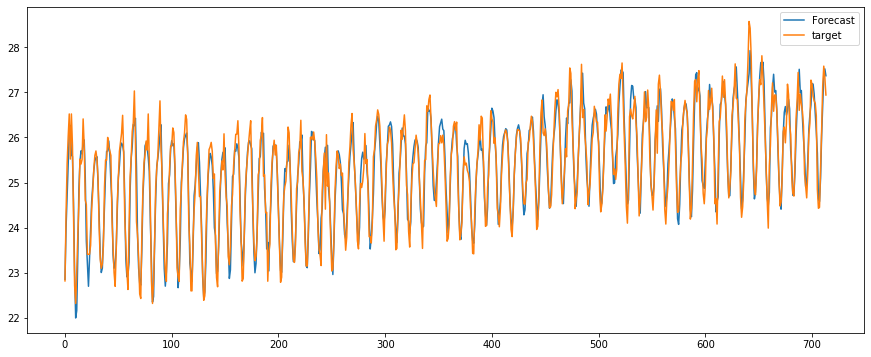

In [165]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [166]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [167]:
MAPE(y_train,trainPredict)

1.0685567908685878

In [168]:
#Teste

In [169]:
testPredict = modelo.predict(X_test)

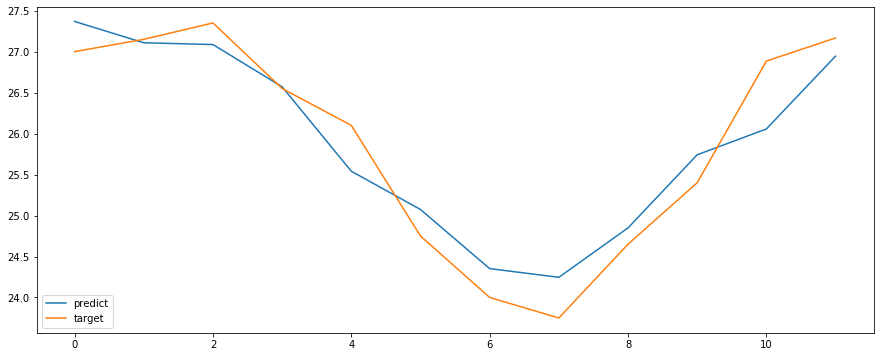

In [170]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [171]:
MAPE(y_test,testPredict )

1.3012676729425887

In [502]:
################################################# USANDO KNN #####################################################

In [503]:
#Modelagem e treinamento

import itertools

In [504]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE

def treinar_knn(x_train, y_train, x_val, y_val):
    
    k = [2, 4, 8, 10]
    metric = ['euclidean', 'minkowski']
    
    hyper_param = list(itertools.product(k,metric))

    best_result = np.Inf
    for i, j  in hyper_param:

      knn = KNeighborsRegressor(n_neighbors=i,  metric=j)
      knn.fit(x_train, y_train)
      predict_validation = knn.predict(x_val)
      mse = MSE(y_val, predict_validation)

      if mse < best_result:
          best_result = mse
          select_model = knn
                                
                                    
    
    
    
    return select_model

In [505]:
modelo =  treinar_knn(X_train, y_train, X_val, y_val)

In [506]:
trainPredict = modelo.predict(X_train)

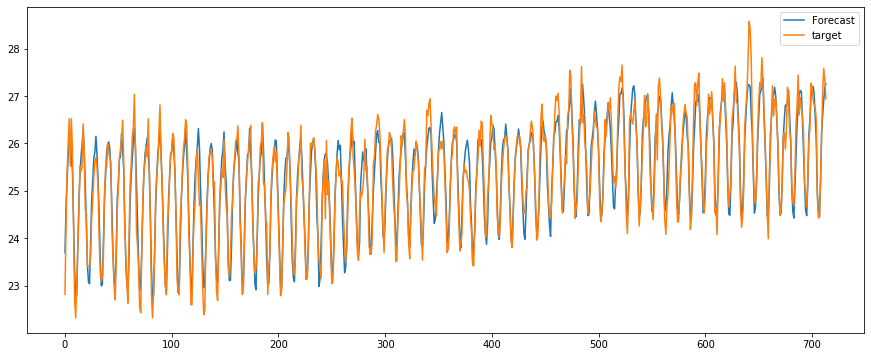

In [507]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [508]:
#TESTE

In [509]:
testPredict = modelo.predict(X_test)

In [510]:
testPredict

array([27.07625, 27.04625, 27.10125, 26.47125, 25.9575 , 25.00875,
       24.485  , 24.56875, 25.13625, 26.12875, 26.50625, 26.77   ])

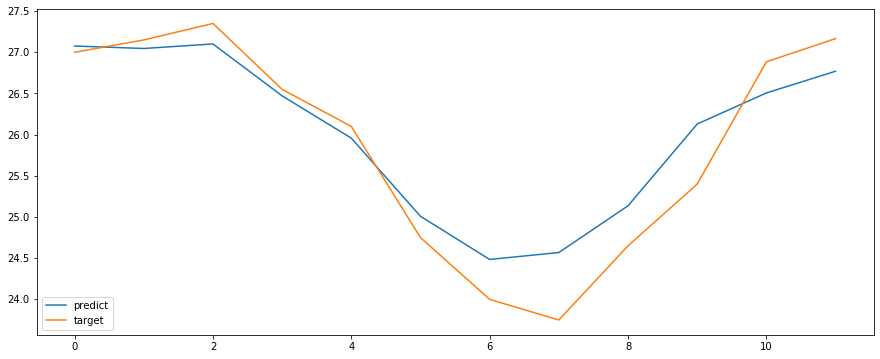

In [511]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [512]:
MAPE(y_test,testPredict )

1.3865116190949924

In [513]:
########################################## Decision Tree ######################################################

In [514]:
#Modelagem/ Treinamento

import itertools

In [515]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

def treinar_decisionTree(x_train, y_train, x_val, y_val):
    
    criterion = ['mse', 'friedman_mse']
    split = ['best', 'random']
    max_depth = [2, 4, 8, 10, 15]
    
    hyper_param = list(itertools.product(criterion, split,max_depth))

    best_result = np.Inf
    for i, j, l  in hyper_param:

      tree = DecisionTreeRegressor(criterion = i, splitter=j, max_depth = l)
      tree.fit(x_train, y_train)
      predict_validation = tree.predict(x_val)
      mse = MSE(y_val, predict_validation)

      if mse < best_result:
          best_result = mse
          select_model = tree
                                
                                    
    
    
    
    return select_model

In [516]:
modelo =  treinar_decisionTree(X_train, y_train, X_val, y_val)

In [517]:
trainPredict = modelo.predict(X_train)

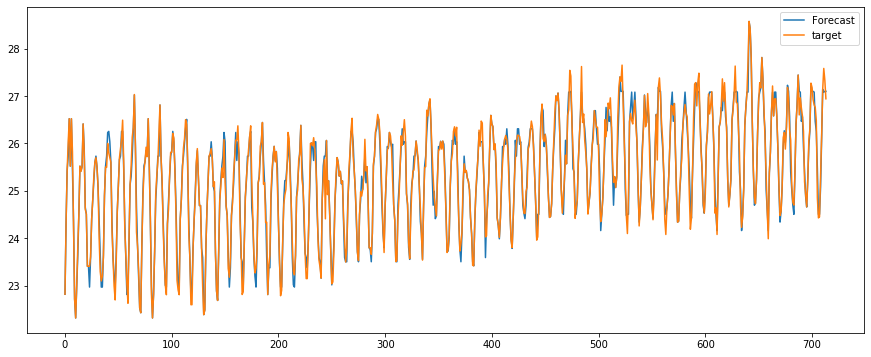

In [518]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='target')
plt.legend()
plt.show()

In [519]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [520]:
testPredict = modelo.predict(X_test)

In [521]:
testPredict

array([26.58      , 27.08083333, 26.92      , 25.83      , 25.92166667,
       25.02555556, 24.63      , 24.745     , 25.21      , 25.24      ,
       26.59      , 27.08083333])

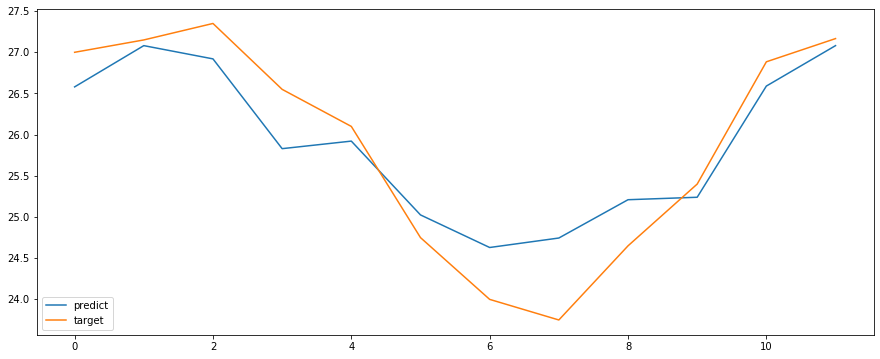

In [522]:
plt.plot(testPredict, label = 'predict')
plt.plot(y_test, label= 'target')
plt.legend()
plt.show()

In [523]:
MAPE(y_test,testPredict )

1.584803996622637

In [ ]:
#Conclusão dos resultados dos testes.

In [ ]:
'''Diante análise, pode perceber que dos algoritmos de aprendizagem que se saíu melhor para generalizar para mêses
a frente, foi o modelo MLP com a curácia de 1.3012 para dados de teste. A baixo segue os resultados.

MLP: 1.3012676729425887             
KNN : 1.3865116190949924
sarima: 1.4250753889801668
Decision Tree: 1.584803996622637
'''